<a href="https://colab.research.google.com/github/jesolisp/Curso-Optimizacion/blob/main/codes/JESP_09_Quasi_Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo de Quasi-Newton

---

<ul>
    <li><strong>Autor:</strong> Jesús Emmanuel Solís Pérez </li>
    <li><strong>Contacto:</strong> <a href="mailto:jsolisp@unam.mx">jsolisp@unam.mx</a>
</ul>

---

# Propósito
El objetivo de este cuaderno es mostrar los fundamentos matemáticos para el método de Quasi-Newton.

# Preliminares matemáticos

## Quasi-Newton
Fue propuesto por Broyden, Fletcher, Goldfarb, y Shanno (BFGS). Considere la derivada de una función objetivo de forma cuadrática en la iteración $x_{k}$

\begin{equation}
 \label{eqn:model}
 m_{k}(p) = f_{k} + \nabla f_{k}^{T}p + \frac{1}{2}p^{T}B_{k}p,
\end{equation}

donde $B_{k}\in\mathbb{R}^{n\times n}$ es una matriz simétrica definida positiva que es actualizada en cada iteración.

**Observación.** El valor de la función y el gradiente de la Ec. \eqref{eqn:model} en $t=0$ coincide con $f_{k}$ y $\nabla f_{k}$, respectivamente.

Entonces, el minimizador $p_{k}$ de la función cuadrática convexa se puede escribir de la siguiente forma

\begin{equation}
 \label{eqn:direction}
 p_{k} = -B_{k}^{-1}\nabla f_{k},
\end{equation}

donde la Ec. \eqref{eqn:direction} se utiliza como la dirección de búsqueda. Por consiguiente, la nueva iteración se obtiene a partir de la siguiente expresión

\begin{equation}
 \label{eqn:iteration}
 x_{k+1} = x_{k} + \eta_{k}p_{k},
\end{equation}

donde el tamaño $\eta_{k}$ se escoge para satisfacer las conficiones de Wolfe.

**Observación.** La Ec. \eqref{eqn:iteration} es similar al método de Newton de búsqueda lineal (LSNM). La diferencia radica en que LSNM usa una aproximación a la matriz Hessiana $B_{k}$ en lugar de la Hessiana real.

Davidon propone actualizar $\beta_{k}$ de una forma más sencilla considerando la curvatura medida durante el paso actual. Es decir, considere la iteración $x_{k+1}$ para construir una nueva función cuadrática de la forma

\begin{equation}
 m_{k+1} (p) = f_{k+1} + \nabla f_{k+1}^{T}p + \frac{1}{2}p^{T}B_{k+1}p.
\end{equation}

**Ecuación de la secante**

La siguiente ecuación

\begin{equation}
 \label{eqn:ec_sec}
 B_{k+1}s_{k} = y_{k},
\end{equation}

que viene de la manipulación 

\begin{equation}
 B_{k+1}\eta_{k}p_{k} = \nabla f_{k+1} - \nabla f_{k},
\end{equation}

con 

\begin{equation}
 s_{k} = x_{k+1} - x_{k} = \eta_{k}p_{k},
\end{equation}

\begin{equation}
 y_{k} = \nabla f_{k+1}-\nabla f_{k},
\end{equation}

requiere que la matriz simétrica definida positiva $B_{k}$ mapee $s_{k}$ en $y_{k}$ dado un desplazamiento $s_{k}$ y el gradiente $y_{k}$. Esta restricción sólo se cumple si $s_{k}$ y $y_{k}$ satisface la *condición de curvatura*

\begin{equation}
 \label{eqn:cond_curv}
 s_{k}^{T}y_{k}> 0.
\end{equation}

No obstante, la Ec. \eqref{eqn:cond_curv} no siempre se cumple para funciones no convexas.

Para determinar $B_{k+1}$, debemos hacer que  entre todas las matrices simétricas que satisfacen la ecuación secante, $B_{k+1}$, sea lo más aproximado posible a la matriz actual $B_{k}$. Es decir, necesitamos resolver el siguiente problema de optimización

\begin{equation}
 \label{eqn:B_opt}
 \underset{B}{\min}\| B-B_{k} \|,
\end{equation}

s.a.

\begin{equation}
 B = B^{T}, \quad Bs_{k} = y_{k},
\end{equation}

tal que $s_{k}, y_{k}$ deben satisfacer la condición de curvatura \eqref{eqn:cond_curv} y $B_{k}$ debe ser simétrica y definida positiva.

Una norma que permite obtener la minimización de la Ec. \eqref{eqn:B_opt} es la norma ponderada de Frobenius

\begin{equation}
 \label{eqn:F_norm}
 \|A\|_{W} \equiv \| W^{1/2} A W^{1/2} \|_{F},
\end{equation}

donde $\| \cdot \|_{F}$ está definido por $\|C\|^{2}_{F} = \sum_{i=1}^{n}\sum_{j=1}^{n}c_{ij}^{2}$. Además, $W$ puede ser cualquier matriz que satisfaga la siguiente relación $Wy_{k} = s_{k}$.

Por consiguiente, la única solución de \eqref{eqn:B_opt} que involucra la matriz de pesos W y la norma \eqref{eqn:F_norm} está dada como sigue

\begin{equation}
 \label{eqn:B_DFP}
 B^{DFP}_{k+1} = \left( I - \rho_{k}y_{k}s_{k}^{T} \right)B_{k}\left( I - \rho_{k}y_{k}s_{k}^{T} \right) + \rho_{k}y_{k}y_{k}^{T},
\end{equation}

con 

\begin{equation}
 \label{eqn:rho_k}
 \rho_{k} = \frac{1}{y_{k}^{T}s_{k}}.
\end{equation}

La Ec. \eqref{eqn:B_DFP} fue propuesta por Davidon y es llamada ecuación de actualización DFP, de modo que la inversa de $B_{k}$ se denota como

\begin{equation}
 H_{k} = B_{k}^{-1}.
\end{equation}

Con esta nueva relación, es posible aproximar $H_{k}$ considerando que se debe cumplir la ecuación de la secante \eqref{eqn:ec_sec}. De este modo, podemos utilizar la ecuación Sherman-Morrison-Woodbury para obtener la siguiente expresión

\begin{equation}
 \label{eqn:H_DFP}
 H_{k+1}^{DFP} = H_{k} - \frac{H_{k}y_{k}y_{k}^{T}H_{k}}{y_{k}^{T}H_{k}y_{k}} + \frac{s_{k}s_{k}^{T}}{y_{k}^{T}s_{k}}.
\end{equation}

La Ec.  \eqref{eqn:H_DFP} es efectiva pero no tanto si hacemos un contraste con la ecuación de BFGS. Si hacemos un cambio en el argumento de la Ec. \eqref{eqn:B_DFP}, de este modo, la actualización de $H$ en $k+1$ debe ser simétrica, definida positiva y satisfacer \eqref{eqn:ec_sec} como sigue

\begin{equation}
 H_{k+1}y_{k} = s_{k}.
\end{equation}

La única solución al siguiente problema de optimización

\begin{equation}
 H_{k+1}^{BFGS} = \left(I - \rho_{k}s_{k}y_{k}^{T}\right)H_{k}\left(I - \rho_{k}s_{k}y_{k}^{T}\right) + \rho_{k}s_{k}s_{k}^{T},
\end{equation}

con $\rho_{k}$ dado por la Ec. \eqref{eqn:rho_k}. 

Finalmente, el algoritmo que resume al método  BFGS está dado como sigue

![alg_bfgs.png](../figures/alg_bfgs.png)

## Ecuación Sherman-Morrison-Woodbury
Sea una matriz $A$ no singular que se somete a una actualización de rango uno 

\begin{equation}
 \label{eqn:form1}
 \bar{A} = A + ab^{T},
\end{equation}

donde $a,b \in \mathbb{R}^{n}$, entonces si $\bar{A}$ es no singular, tenemos

\begin{equation}
 \bar{A}^{-1} = {A}^{-1} - \frac{{A}^{-1}ab^{T}A^{-1}}{1 + b^{T}A^{-1}a}.
\end{equation}

**Observación.** Verifique la ecuación anterior.

Extendiendo la Ec. \eqref{eqn:form1} a rangos superiores, tenemos

\begin{equation}
 \hat{A} = A + UV^{T},
\end{equation}

donde $U,V \in \mathbb{R}^{n\times p}$ para cualquier $p\in[1,n]$.

Además, $\hat{A}$ es no singular $\Leftrightarrow$ $(I + V^{T}A^{-1}U)$ es no singular. Por consiguiente, tenemos

\begin{equation}
 \hat{A}^{-1} = A^{-1} - A^{-1}U(I + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}.
\end{equation}


# Setup

## Library import
We import all the required Python libraries

In [ ]:
# Data manipulation
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "serif"
plt.rc('axes', titlesize=20)        # Controls Axes Title
plt.rc('axes', labelsize=20)        # Controls Axes Labels
plt.rc('xtick', labelsize=20)       # Controls x Tick Labels
plt.rc('ytick', labelsize=20)       # Controls y Tick Labels
plt.rc('legend', fontsize=15)       # Controls Legend Font
plt.rc('figure', titlesize=15)      # Controls Figure Title
%matplotlib inline

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

# Definición de funciones
Definimos todas las funciones que comprenden el método Quasi-Newton.

In [ ]:
def armijo(eta, x, p, f0, f1, c1 = 1e-4, rho = 0.5):
    """
    Función que verifica si el tamaño de paso satisface la condición de Armijo
    f(x+eta*p)<=f(x)+c1*eta*gradient(f(x))*p

    Parameters
    ----------
    eta : 1*1
        Tamaño de paso actual.
    x : (N*1)
        Iteración actual.
    p : (N*1)
        Dirección de búsqueda.
    f0 : (RN->R)
        Función objetivo.
    f1 : (RN->RN)
        Gradiente de la función.
    c1 : (1*1)
        Constante proporcionada por el usuario en el rango [0,0.5].
    rho : (1*1)
        Constante proporcionada por el usuario en el rango [0,1].

    Returns
    -------
    valor de eta si la condición se cumple.

    """
    
    j = 1
    while (j>0):
        x_new = x + eta*p;
        if (f0(x_new)<=f0(x)+c1*eta*np.dot(f1(x),p)):
            j = 0
            eta_armijo = eta
        else:
            eta = eta*rho

    return eta_armijo

In [ ]:
def BFGS(H, x, s, y):
    """
    Parámetros
    ----------
    H : TYPE
        Matriz Hessiana.
    x : TYPE
        Valores de x en la iteración.
    s : TYPE
        Diferencia entre el valor siguiente y el actual.
    y : TYPE
        Diferencia entre el siguiente gradiente y el actual.

    Returns
    -------
    TYPE
        Actualización de H que satisface la condición de curvatura.
    """
    
    smooth = 1e-3  # Para evitar división por cero
    s   = np.expand_dims(s, axis= -1) # Ec. (7)
    y   = np.expand_dims(y, axis= -1) # Ec. (8)
    rho = 1/(np.dot(y.T,s) + smooth) # Ec. (14)
    BFGS = -rho*np.dot(s,y.T)
    I_BFGS = np.eye(H.shape[0]) - BFGS
    return I_BFGS*H*I_BFGS + BFGS # Ec. (18)

In [ ]:
def quasi_Newton(x0, F, gradF, H, tol = 1e-4,  c1 = 1e-4, rho = 0.2):
    """
    Parámetros
    ----------
    x0 : TYPE
        Punto inicial.
    F : TYPE
        Función a minimizar.
    gradF : TYPE
        Gradiente de la función.
    H : TYPE
        Matriz Hessiana de la función.
    tol : TYPE, optional
        Tolerancia del algoritmo. The default is 1e-4.
    c1 : TYPE, optional
        Constante de Armijo. The default is 1e-4.
    rho : TYPE, optional
        Constante de Armijo. The default is 0.2.

    Returns
    -------
    F(x):
        Función evaluada en el valor mínimo X0.
    Xit:
      Vector de trayectorias de X..
    """
    
    x = x0
    H = H(x)
    xx = [x]
    
    while (np.linalg.norm(gradF(x))>tol):
        p = -np.dot(gradF(x), np.linalg.inv(H))
        
        # Paso de acuerdo con la condición de Armijo
        eta_guess = 0.5*np.abs(np.dot(gradF(x),p))/(np.linalg.norm(p))**2
        eta = armijo(eta_guess,x,p,F,gradF)

        x_ = x
        x = x + eta*p
        s = x - x_
        y = gradF(x) - gradF(x_)
        H = BFGS(H, x, s, y)
        xx.append(x)
        
    return F(x), np.asarray(xx)

# Caso I. Función de dos variables

Sea la función

\begin{equation}
  f\left(x_{1},x_{2}\right) = \left(x_{1} - 2\right)^{4} + x_{2}^{2}\left(x_{1} - 2\right)^{2} + \left(x_{2} + 1\right)^{2},
\end{equation}

encuentre los valores mínimos utilizando el método de Quasi-Newton.

In [ ]:
x0 = np.array([7,8]) # Puntos iniciales

tol = 1e-6; # Tolerancia del algoritmo
c1 = 1e-4 # en el rango de [1e-4,1e-3] para Armijo (opcional)
rho = 0.2 # en el rango de [0.1,0.5] para Armijo (opcional)

F = lambda x: (x[0] - 2)**4 + x[1]**2*(x[0] - 2)**2 + (x[1] + 1)**2
gradF = lambda x: np.array([4*(x[0] - 2)**3 + x[1]**2*(2*x[0] - 4),2*x[1] + 2*x[1]*(x[0] - 2)**2 + 2])
H = lambda x: np.array([[2*x[1]**2+12*(x[0]-2)**2, 4*(x[0]-2)*x[1]],
                                                 [4*(x[0]-2)*x[1], 2*(x[0]-2)**2+2]])

Fmin, xk = quasi_Newton(x0, F, gradF, H, tol, c1, rho)

## Graficación de resultados

In [ ]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2: (x1 - 2)**4 + x2**2*(x1 - 2)**2 + (x2 + 1)**2

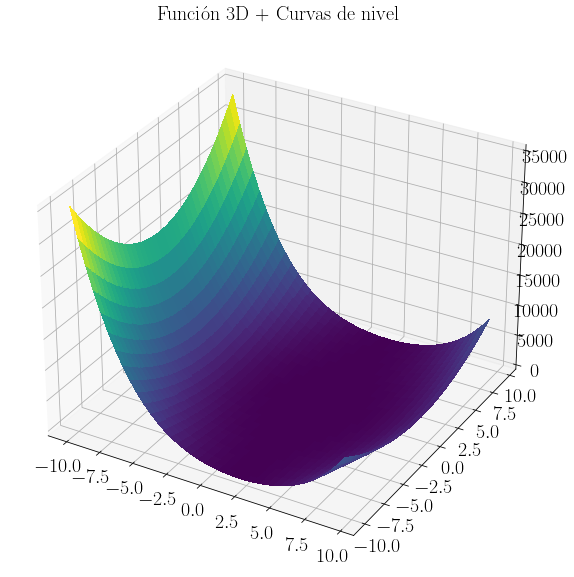

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

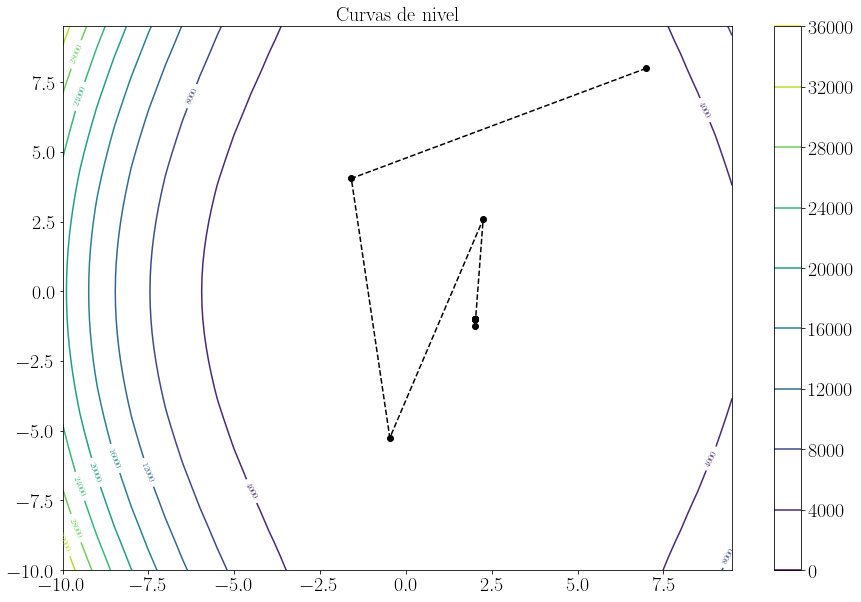

In [ ]:
plt.figure(figsize=(15,10))
contours = plt.contour(X, Y, F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

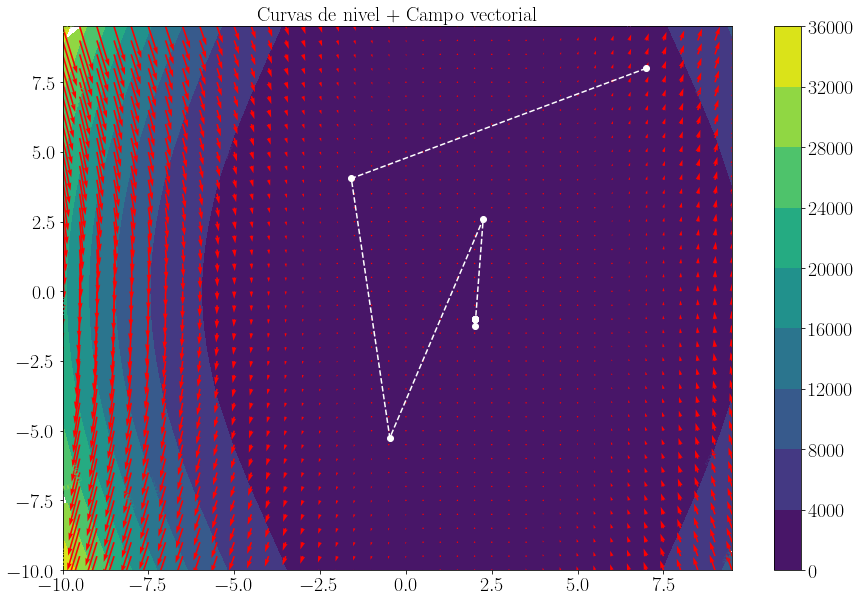

In [ ]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

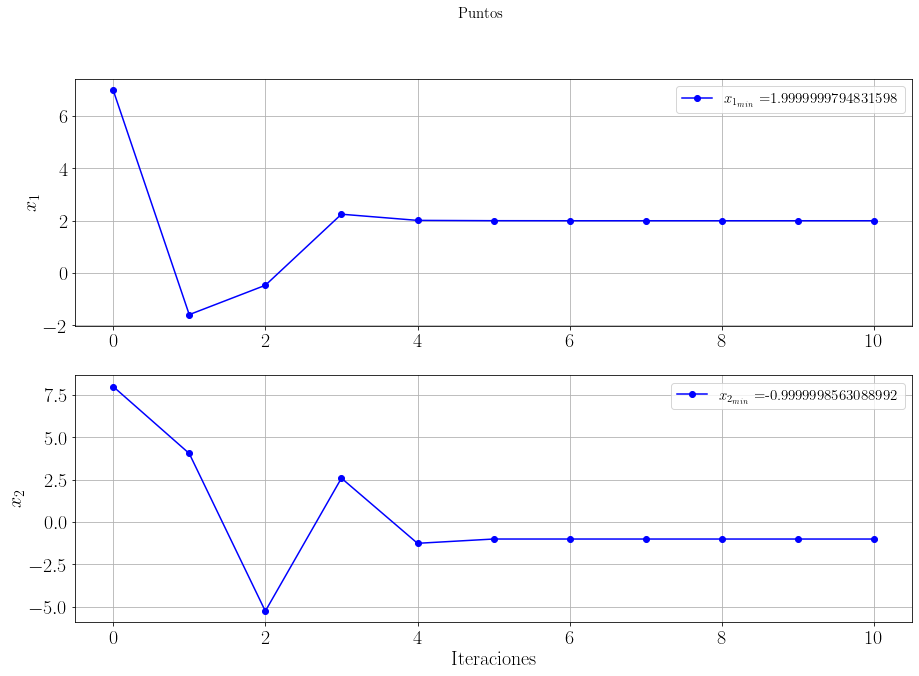

In [ ]:
iterations = np.arange(0,len(xk))

fig, axs = plt.subplots(2, figsize = (15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(xk[-1,0]))
# axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$')
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend()

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(xk[-1,1]))
# axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$')
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend()
plt.show()

# Caso II. Función Booth
La función Booth está definida por

\begin{equation}
 f\left(x_{1} , x_{2}\right) = \left(x_{1} + 2x_{2} − 7\right)^{2} + \left(2x_{1} + x_{2} − 5\right)^{2}.
\end{equation}

Utilice el método de Quasi-Newton para minimizar la función de Booth considerando que el espacio de búsqueda está dado por $x_{i} \in [-10,10] \forall i=1,2$. Además, considere como punto inicial

\begin{equation}
 x_{0} = \begin{bmatrix} 10 & 0 \end{bmatrix}^{T}.
\end{equation}

In [ ]:
x0 = np.array([10,0]) # Puntos iniciales

tol = 1e-6; # Tolerancia del algoritmo
c1 = 1e-4 # en el rango de [1e-4,1e-3] para Armijo (opcional)
rho = 0.2 # en el rango de [0.1,0.5] para Armijo (opcional)
    
# Función objetivo
F = lambda x: np.power((x[0] + 2*x[1] - 7),2) + np.power((2*x[0] + x[1] - 5),2)
gradF = lambda x: np.array([8*x[1] + 10*x[0] - 34,10*x[1] + 8*x[0] - 38])
H = lambda x: np.array([[10, 8],
                                                [8, 10]])
    
Fmin, xk = quasi_Newton(x0, F, gradF, H, tol, c1, rho)

## Graficación de resultados

In [ ]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2:  (x1 + 2*x2 - 7)**2 + (2*x1 + x2 - 5)**2

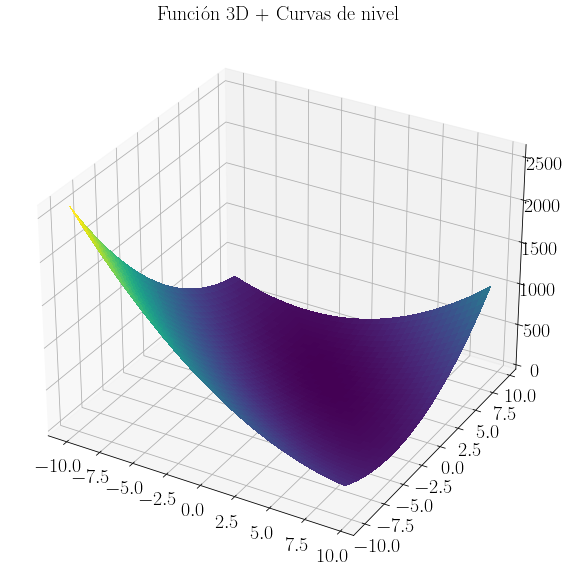

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

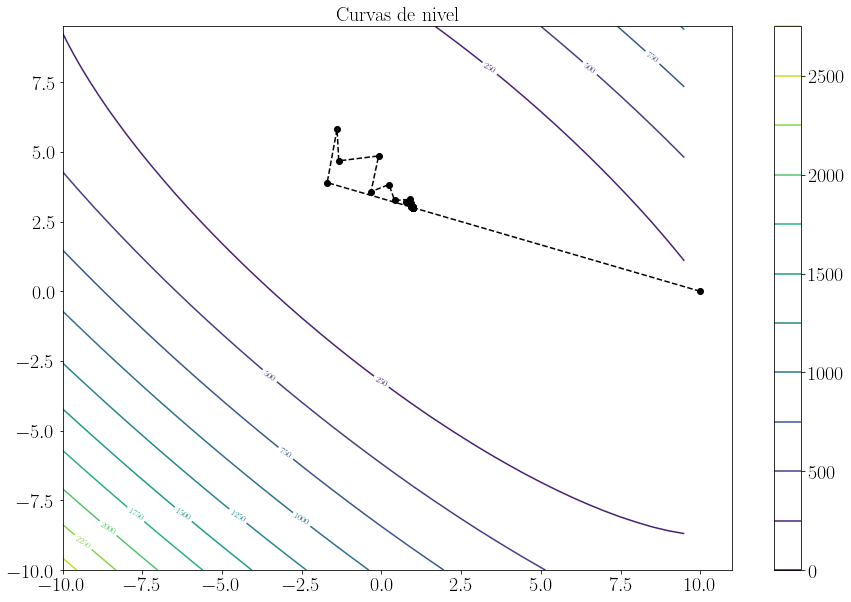

In [ ]:
plt.figure(figsize=(15,10));
contours = plt.contour(X, Y, F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

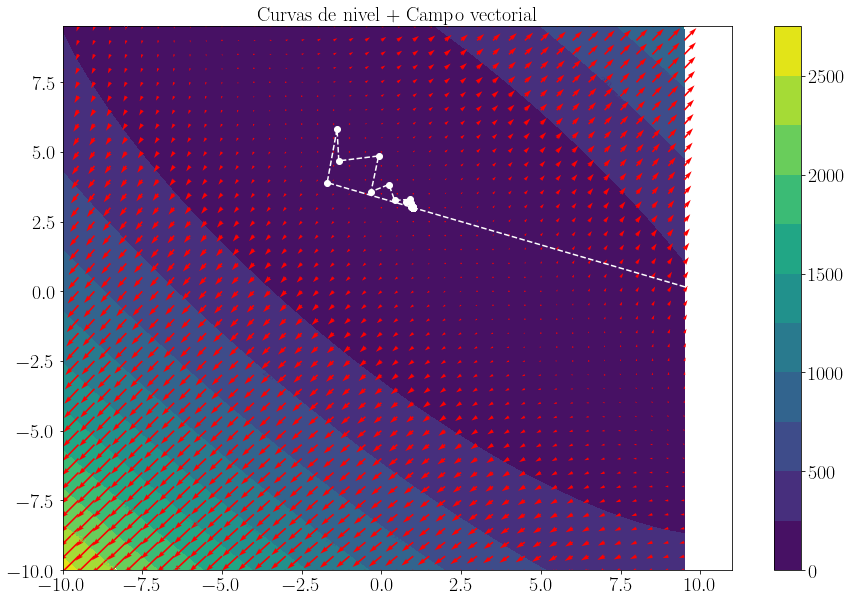

In [ ]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

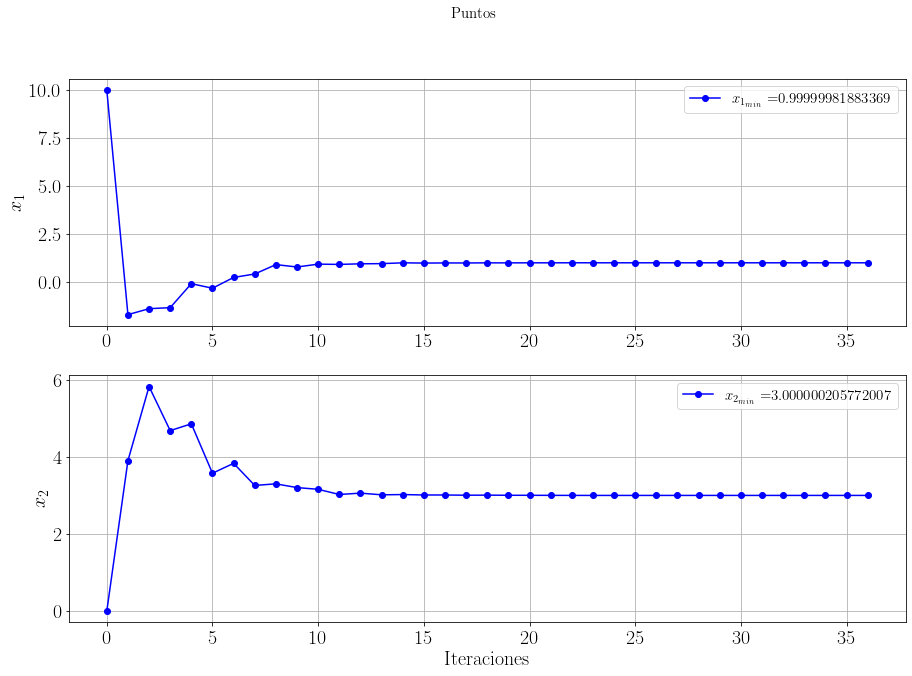

In [ ]:
iterations = np.arange(0,len(xk))
       
fig, axs = plt.subplots(2, figsize=(15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(xk[-1,0]))
# axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$')
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend()

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(xk[-1,1]))
# axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$')
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend()
plt.show()

# Caso III. Función de Matyas
La función de Matyas está definida por

\begin{equation}
 f\left(x_{1},x_{2}\right) = 0.26\left(x_{1}^{2} + x_{2}^{2}\right)- 0.48x_{1}x_{2}.
\end{equation}

Utilice el método de Quasi-Newton para minimizar la función de Matyas considerando que el espacio de búsqueda está dado por $x_{i} \in [-10,10] \forall i=1,2$. Además, considere como punto inicial

\begin{equation}
 x_{0} = \begin{bmatrix} 5 & -5 \end{bmatrix}^{T}.
\end{equation}

In [ ]:
x0 = np.array([5,-5]) # Puntos iniciales
    
tol = 1e-6; # Tolerancia del algoritmo
c1 = 1e-4 # en el rango de [1e-4,1e-3] para Armijo (opcional)
rho = 0.2 # en el rango de [0.1,0.5] para Armijo (opcional)
    
# Función objetivo
F = lambda x: 0.26*(x[0]**2+x[1]**2)-0.48*x[0]*x[1]
gradF = lambda x: np.array([-(12*x[1]-13*x[0])/25,
                                                           (13*x[1]-12*x[0])/25])
H = lambda x: np.array([[0.52, -0.48],
                                                [-0.48, 0.52]])
    
Fmin, xk = quasi_Newton(x0, F, gradF, H, tol, c1, rho)

## Graficación de resultados

In [ ]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2: (x1 - 2)**4 + x2**2*(x1 - 2)**2 + (x2 + 1)**2

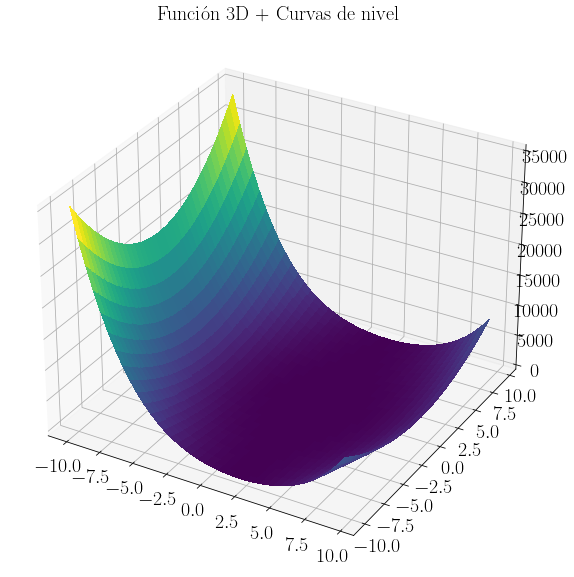

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

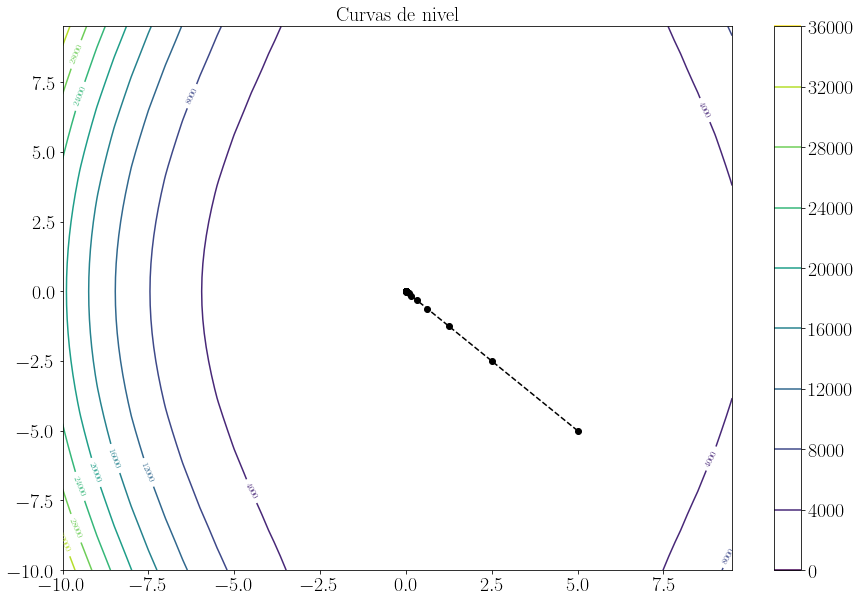

In [ ]:
plt.figure(figsize=(15,10));
contours = plt.contour(X, Y, F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

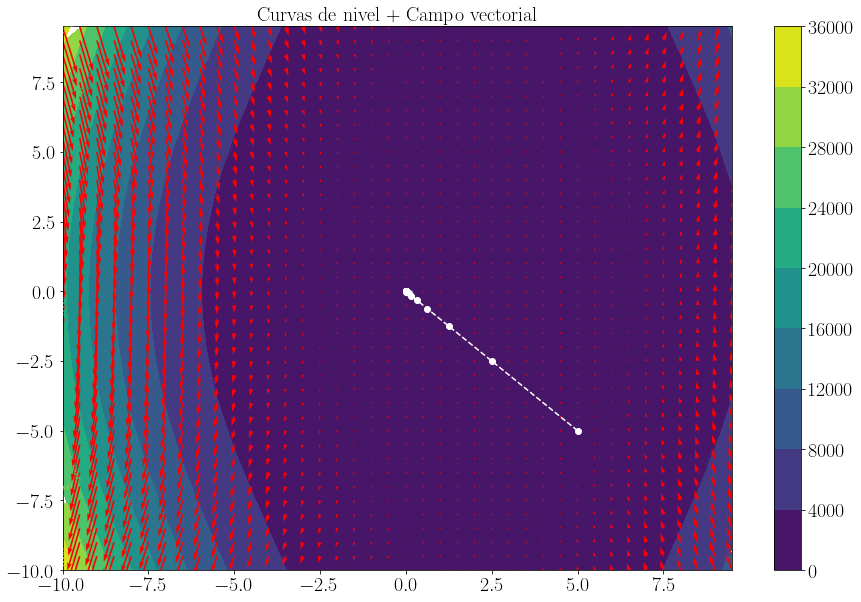

In [ ]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

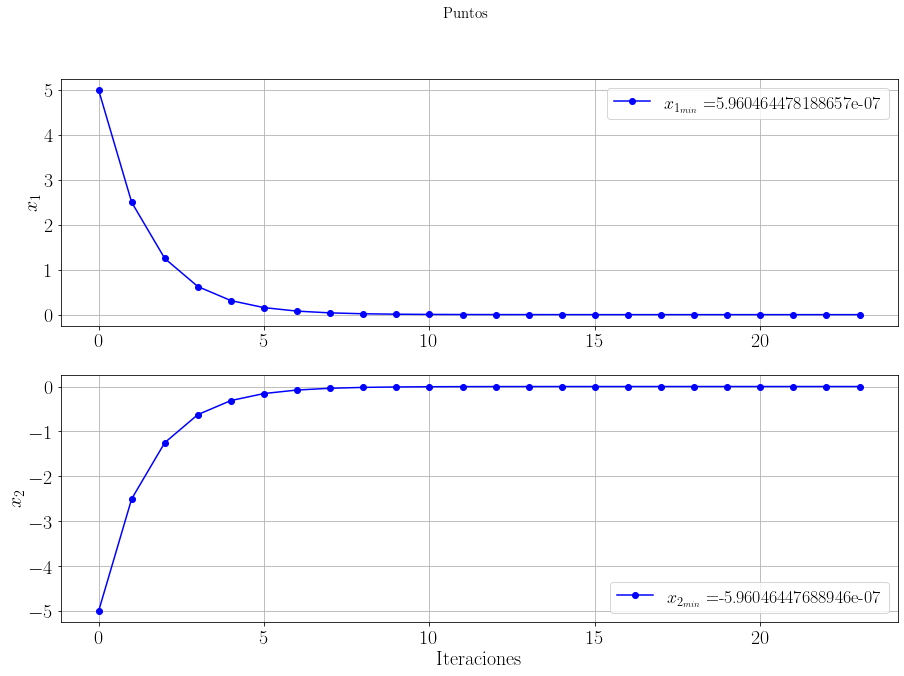

In [ ]:
iterations = np.arange(0,len(xk))
       
fig, axs = plt.subplots(2,figsize=(15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(xk[-1,0]))
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend(fontsize=18)

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(xk[-1,1]))
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend(fontsize=18)
plt.show()

# Caso IV. Función de Beale
La función de Beale está definida por

\begin{equation}
 f\left(x_{1},x_{2}\right) = \left(1.5 - x_{1} + x_{1}x_{2}\right)^{2} + \left(2.25 - x_{1} + x_{1}x_{2}^{2}\right)^{2} + \left(2.62 - x_{1} + x_{1}x_{2}^{3}\right)^{2}.
\end{equation}

Utilice el método de Quasi-Newton para minimizar la función de Beale considerando que el espacio de búsqueda está dado por $x_{i} \in [-4.5,4.5] \forall i=1,2$. Además, considere como punto inicial

\begin{equation}
 x_{0} = \begin{bmatrix} -3 & 3 \end{bmatrix}^{T}.
\end{equation}

# Caso V. Función de dos variables

Sea la función

\begin{equation}
  f\left(x_{1},x_{2}\right) = \left(x_{1}^2+x_{2}-11\right)^2 + \left(x_{1} + x_{2}^2-7\right)^2,
\end{equation}

encuentre los valores mínimos utilizando el algoritmo de Quasi-Newton.

In [ ]:
x0 = np.array([-5,5]) # Puntos iniciales
    
tol = 1e-6; # Tolerancia del algoritmo
c1 = 1e-4 # en el rango de [1e-4,1e-3] para Armijo (opcional)
rho = 0.2 # en el rango de [0.1,0.5] para Armijo (opcional)
    
# Función objetivo
F = lambda x: (x[0]**2+x[1]-11)**2 + (x[0] + x[1]**2-7)**2
gradF = lambda x: np.array([2*x[1]**2+4*x[0]*x[1]+4*x[0]**3-42*x[0]-14,
                                                         4*x[1]**3+(4*x[0]-26)*x[1]+2*x[0]**2-22])
H = lambda x: np.array([[4*(x[1]+x[0]**2-11)+8*x[0]**2+2, 4*x[1]+4*x[0]],
                                                [4*x[1]+4*x[0], 4*(x[1]**2+x[0]-7)+8*x[1]**2+2]])
    
Fmin, xk = quasi_Newton(x0, F, gradF, H, tol, c1, rho)

## Graficación de resultados

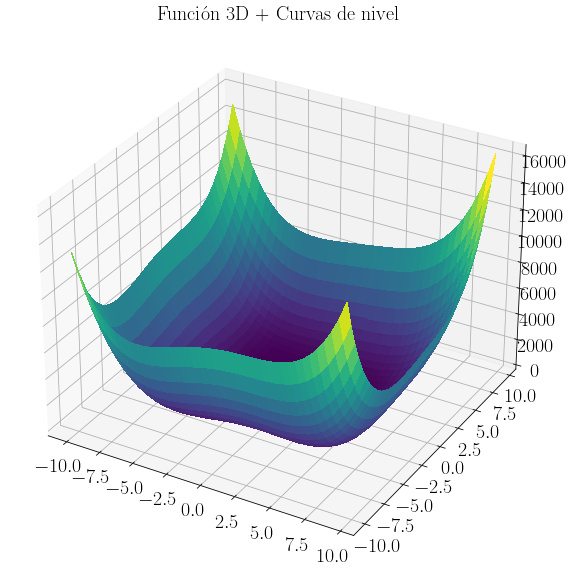

In [ ]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2: (x1**2+x2-11)**2 + (x1 + x2**2-7)**2

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

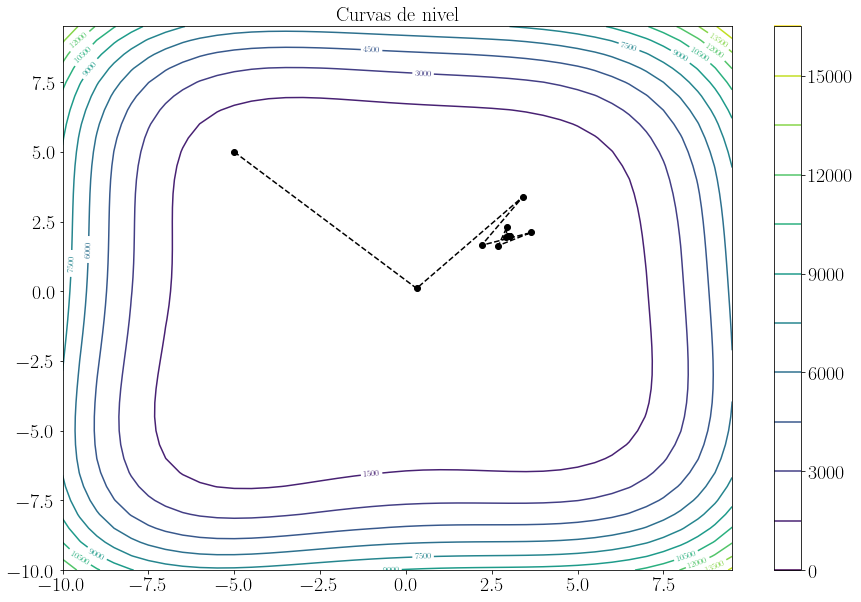

In [ ]:
plt.figure(figsize=(15,10));
contours = plt.contour(X, Y, F(X,Y), 15)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

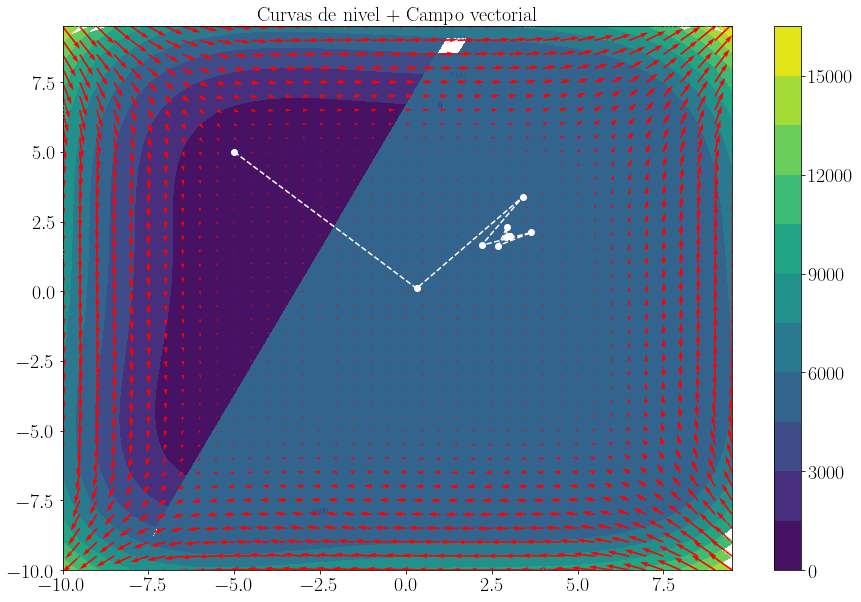

In [ ]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 15)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

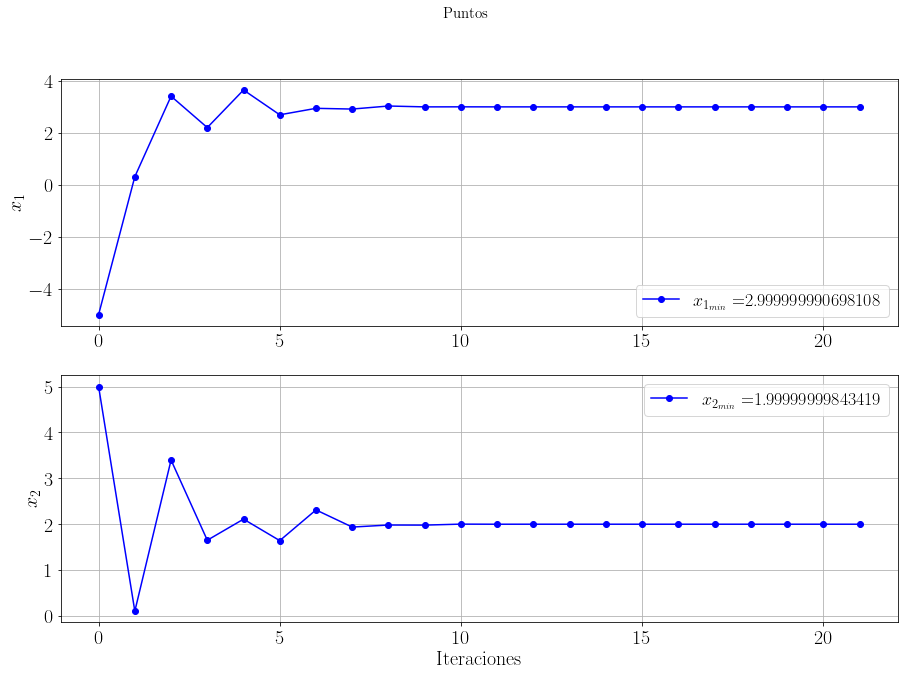

In [ ]:
iterations = np.arange(0,len(xk))
       
fig, axs = plt.subplots(2,figsize=(15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(xk[-1,0]))
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend(fontsize=18)

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(xk[-1,1]))
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend(fontsize=18)
plt.show()

# Referencias
[1] Fletcher, Reeves, and Colin M. Reeves. "Function minimization by conjugate gradients." *The computer journal* 7.2 (1964): 149-154.

[2] Ernesto, R. W., Ernesto, L. G., Rafael, B., & Yolanda, G. G. (2016). Perfiles de comportamiento numérico de los métodos de búsqueda immune network algorithm y bacterial foraging optimization algorithm en funciones benchmark. *Ingeniería, investigación y tecnología*, 17(4), 479-490.

